# Example SLVNA API usage

In [12]:
# Insert our project's root path to sys.path
# for the last imports (`from project`) to work.
import sys
from os.path import curdir, dirname, join, realpath

ROOT = dirname(dirname(realpath(curdir)))
if ROOT not in sys.path:
    sys.path.insert(0, ROOT)
    print(f"Inserted root dir '{ROOT}' into sys.path to find 'project' dir.")

from time import strftime

# Matplotlib for simplicity
import matplotlib.pyplot as plt

# Import both the VNA and generator driver classes
from project import SLVNA, generator

## Setup

Initialise the constants for the VNA: the IP address of the Red Pitaya and the generators with their reference oscillator settings. Then, an `SLVNA` object can be created. Because the SLVNA API is object oriented, multiple VNA objects can easily be initiated.

In [2]:
ADDR_RP = "192.168.178.26:2024"
"""IP address and port (default :2024) of the Red Pitaya"""

GEN_RF = generator.APUASYN20Controller(
    "TCPIP::172.19.20.24",
    ref_out_enabled=True, ext_ref_listen=False, out_freq=100E6, in_freq=100E6
)
GEN_LO = generator.APUASYN20Controller(
    "TCPIP::172.19.20.25",
    ref_out_enabled=True, ext_ref_listen=False, out_freq=100E6, in_freq=100E6
)
GEN_CLK = generator.APUASYN20Controller(
    "TCPIP::172.19.20.55",
    ref_out_enabled=False, ext_ref_listen=True, out_freq=100E6, in_freq=100E6
)

# The initialiser for the VNA class takes in address of the RP and preprepared generator objects.
# Needs first three, GEN_CLK is optional.
vna = SLVNA(ADDR_RP, GEN_RF, GEN_LO, GEN_CLK)

## Frequency sweep

The current API has implemented frequency sweeps with parameters set by the user. This example configures the following frequency sweep settings of our `vna`: start frequency, stop frequency, number of measurement points, timestep per point, power through DUT. Also other options like intermediate frequency bandwith, meaning `1 / timestep`, are supported as keyword arguments: `ifbw=1E3`.

In [3]:
vna.set_fsweep(4500E6, 8000E6, points=1001, timestep=1E-3, power=23)

In [4]:
# You can change almost any parameter (in this case the start frequency)
# with the `set_` method before starting a measurement.
vna.set_(start_freq=4000E6)

Run a quick measurement to check if your setup is correct. Low magnitude and high $S_{21}$ values are detected. If this fails, your hardware might be not connected properly. Compare to the diagram in [VNA_hardware_implemented.png](../hardware/VNA_hardware_implemented.png).

In [7]:
vna.setup_test()

2024-12-13 11:21:36.582084 Connected with AnaPico AG,APUASYN20[pico24],911-0M1000000-0070,0.4.209
 as RF generator.
2024-12-13 11:21:36.582084 Connected with AnaPico AG,APUASYN20[pico25],911-0M1000000-0069,0.4.209
 as LO generator.
2024-12-13 11:21:36.582084 Connected with AnaPico AG,APUASYN20[pico55],911-0M1000000-0077,0.4.209
 as clock generator.
2024-12-13 11:21:36.598587 Connected with 192.168.178.26:2024 as SoC.
2024-12-13 11:21:36.714161 Configured generators!
2024-12-13 11:21:36.796379 Starting acquisition at 2024-12-13 11:21:36.796379, ETA 2024-12-13 11:21:36.846379 (0.05s). SoC temperature 41.46C.
2024-12-13 11:21:37.315508 Done acquiring at 2024-12-13 11:21:37.264271, took 0:00:00.467892 total. SoC temperature 43.06C.
2024-12-13 11:21:37.331695 TCP client exiting.


True

## Run
When everything has been configured, a measurement can be started. The resulting data and metadata (both an `xarray.Dataset`) are returned. Quick plotting can be done for example with `matplotlib.pyplot.plot`.

2024-12-13 11:22:01.766240 Connected with AnaPico AG,APUASYN20[pico24],911-0M1000000-0070,0.4.209
 as RF generator.
2024-12-13 11:22:01.766240 Connected with AnaPico AG,APUASYN20[pico25],911-0M1000000-0069,0.4.209
 as LO generator.
2024-12-13 11:22:01.766240 Connected with AnaPico AG,APUASYN20[pico55],911-0M1000000-0077,0.4.209
 as clock generator.
2024-12-13 11:22:01.784527 Connected with 192.168.178.26:2024 as SoC.
2024-12-13 11:22:01.902031 Configured generators!
2024-12-13 11:22:01.977611 Starting acquisition at 2024-12-13 11:22:01.977611, ETA 2024-12-13 11:22:02.978611 (1.00s). SoC temperature 42.07C.
2024-12-13 11:22:03.635659 Done acquiring at 2024-12-13 11:22:03.581519, took 0:00:01.603908 total. SoC temperature 44.29C.
2024-12-13 11:22:03.651319 TCP client exiting.


<xarray.Dataset> Size: 192kB
Dimensions:               (f: 1001, t: 1001)
Coordinates:
  * f                     (f) float64 8kB 4e+09 4.004e+09 ... 7.996e+09 8e+09
  * t                     (t) float64 8kB 0.0 0.001 0.002 ... 0.998 0.999 1.0
Data variables: (12/19)
    P_dut                 (f) complex128 16kB (-0.022581731480642554-0.026264...
    P_ref                 (f) complex128 16kB (-0.028971492936188545-0.026395...
    S_21                  (f) complex128 16kB (0.7580167591514595+0.188302934...
    DUT_re_V              (f) float64 8kB -0.02258 0.03428 ... 0.0115 -0.01107
    DUT_im_V              (f) float64 8kB -0.02626 -0.005206 ... 0.004211
    DUT_mag_V             (f) float64 8kB 0.03464 0.03467 ... 0.01191 0.01185
    ...                    ...
    S_21_re               (f) float64 8kB 0.758 0.6714 0.5089 ... 0.452 0.37
    S_21_im               (f) float64 8kB 0.1883 0.4236 0.624 ... 0.2507 0.3664
    S_21_mag              (f) float64 8kB 0.7811 0.7939 0.8052 ... 0.5169 0.5207
    S_21_mag_dB           (f) float64 8kB -1.073 -1.002 ... -2.866 -2.834
    S_21_phase            (f) float64 8kB 0.2435 0.5628 0.8866 ... 0.5065 0.7805
    S_21_phase_unwrapped  (f) float64 8kB 0.2435 0.2607 0.2824 ... 0.2716 0.2435

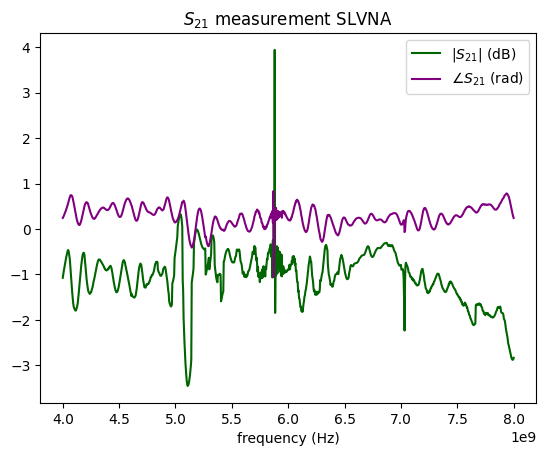

In [9]:
result, metadata = vna.run()

plt.plot(result["f"], result["S_21_mag_dB"], color="darkgreen", label=r"|$S_{21}$| (dB)")
plt.plot(result["f"], result["S_21_phase_unwrapped"], color="purple", label=r"$\angle S_{21}$ (rad)")
plt.title(r"$S_{21}$ measurement SLVNA")
plt.xlabel("frequency (Hz)")
plt.legend()

display(result)

In [10]:
display(metadata)

<xarray.Dataset> Size: 5kB
Dimensions:            ()
Data variables: (12/25)
    addr_soc           <U19 76B '192.168.178.26:2024'
    gen_rf             <U398 2kB "APUASYN20Controller({'name': 'AnaPico AG,AP...
    gen_lo             <U398 2kB "APUASYN20Controller({'name': 'AnaPico AG,AP...
    gen_clk            <U407 2kB "APUASYN20Controller({'name': 'AnaPico AG,AP...
    start_freq         float64 8B 4e+09
    stop_freq          float64 8B 8e+09
    ...                 ...
    socclk_power       float64 8B 10.0
    time               <U26 104B '2024-12-13 11:22:03.651319'
    start_time         <U26 104B '2024-12-13 11:22:01.977611'
    stop_time          <U26 104B '2024-12-13 11:22:03.581519'
    start_temperature  float64 8B 42.07
    stop_temperature   float64 8B 44.29

## Save data

The resulting data and metadata can easily be stored inside netcdf files.

In [11]:
result.to_netcdf(join("measure", strftime("%Y-%m-%d_%H.%M.%S_0000.hdf5")), mode="w", auto_complex=True)
metadata.to_netcdf(join("measure", strftime("%Y-%m-%d_%H.%M.%S_0001.hdf5")), mode="w")